Reduced dataset class counts:
 Phase
1    2684
0    2000
Name: count, dtype: int64


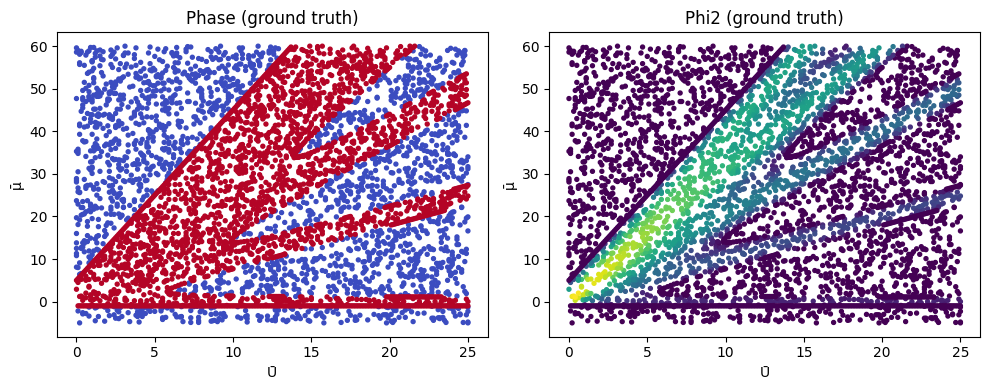

Model: "autoenc_multitask"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)            │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 128)               │             384 │ input[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128)               │               0 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 64)                │           8,256 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               0 │ dense_7[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ latent (Dense)                │ (None, 6)                 │             390 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 32)                │             224 │ latent[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 32)                │             224 │ latent[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 32)                │             224 │ latent[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ phase (Dense)                 │ (None, 1)                 │              33 │ dense_8[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ phi2 (Dense)                  │ (None, 1)                 │              33 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rho (Dense)                   │ (None, 1)                 │              33 │ dense_10[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 9,801 (38.29 KB)

 Trainable params: 9,801 (38.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 0: lam_phys_current=0.000000
Epoch 1/80
15/15 - 2s - 145ms/step - loss: 0.6742 - phase_accuracy: 0.5997 - phase_loss: 0.6735 - phi2_loss: 0.0000e+00 - rho_loss: 0.0000e+00 - val_loss: 0.6445 - val_phase_accuracy: 0.7076 - val_phase_loss: 0.6465 - val_phi2_loss: 0.0000e+00 - val_rho_loss: 0.0000e+00 - learning_rate: 1.0000e-03
Epoch 1: lam_phys_current=0.000000
Epoch 2/80
15/15 - 0s - 11ms/step - loss: 0.6245 - phase_accuracy: 0.7000 - phase_loss: 0.6236 - phi2_loss: 0.0000e+00 - rho_loss: 0.0000e+00 - val_loss: 0.5968 - val_phase_accuracy: 0.7930 - val_phase_loss: 0.5988 - val_phi2_loss: 0.0000e+00 - val_rho_loss: 0.0000e+00 - learning_rate: 1.0000e-03
Epoch 2: lam_phys_current=0.000000
Epoch 3/80
15/15 - 0s - 11ms/step - loss: 0.5849 - phase_accuracy: 0.7473 - phase_loss: 0.5844 - phi2_loss: 0.0000e+00 - rho_loss: 0.0000e+00 - val_loss: 0.5524 - val_phase_accuracy: 0.7375 - val_phase_loss: 0.5534 - val_phi2_loss: 0.0000e+00 - val_rho_loss: 0.0000e+00 - learning_rate: 1.0000e-03


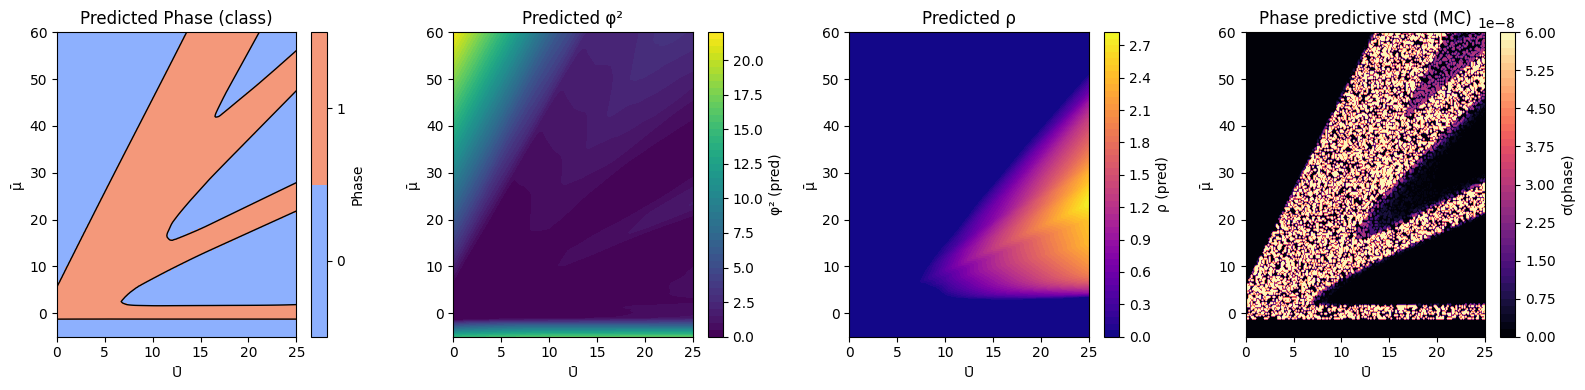

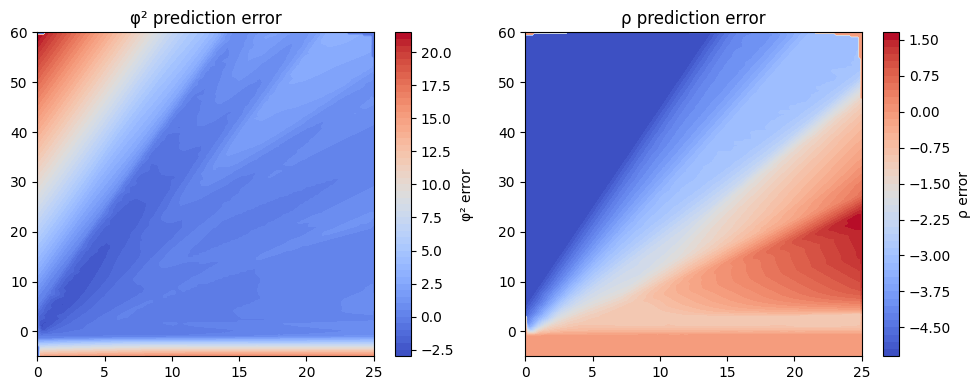


📊 Classification Report (on interpolated grid points):
              precision    recall  f1-score   support

           0     0.9655    0.9410    0.9531     22530
           1     0.9263    0.9566    0.9412     17470

    accuracy                         0.9478     40000
   macro avg     0.9459    0.9488    0.9471     40000
weighted avg     0.9484    0.9478    0.9479     40000



In [2]:
# Supervised Autoencoder-style model: encoder(Ubar,Mubar) -> latent -> heads: phase, phi2, rho
# Ramped physics/regression weight via LambdaRamp callback (same format you provided)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ---------------------------
# Lambda ramp callback (your style)
# ---------------------------
class LambdaRamp(tf.keras.callbacks.Callback):
    def __init__(self, start_epoch, end_epoch, final_value):
        self.start = start_epoch
        self.end = end_epoch
        self.final = final_value

    def on_epoch_begin(self, epoch, logs=None):
        if epoch < self.start:
            val = 0.0
        elif epoch >= self.end:
            val = self.final
        else:
            val = (epoch - self.start) / (self.end - self.start) * self.final
        # store in model for loss to read
        setattr(self.model, "lam_phys_current", float(val))
        print(f"Epoch {epoch}: lam_phys_current={val:.6f}")

# ---------------------------
# 1) Load dataset + sampling (smart sampling as you used earlier)
# ---------------------------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")  # <- change if needed

# Labels
df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

# smart sampling (avoid huge imbalance; keep boundary)
df_MI = df[(df["Phi2"] < 1e-8) & (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))]
df_SF = df[df["Phi2"] > 1e-2]
df_boundary = df[(df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)]

n_MI = min(2000, len(df_MI))
n_SF = min(2000, len(df_SF))
n_boundary = min(6000, len(df_boundary))

# if any group is empty, fall back to using entire df
if len(df_MI) == 0 or len(df_SF) == 0 or len(df_boundary) == 0:
    df_reduced = df.copy()
else:
    df_reduced = pd.concat([
        df_MI.sample(n_MI, random_state=42),
        df_SF.sample(n_SF, random_state=42),
        df_boundary.sample(n_boundary, random_state=42)
    ])

df_reduced = df_reduced.reset_index(drop=True)
df = df_reduced  # use reduced dataset

print("Reduced dataset class counts:\n", df["Phase"].value_counts())

# Plot quick diagnostics (optional)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["Ubar"], df["Mubar"], c=df["Phase"], s=8, cmap="coolwarm")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phase (ground truth)")
plt.subplot(1,2,2)
plt.scatter(df["Ubar"], df["Mubar"], c=df["Phi2"], s=8, cmap="viridis")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Phi2 (ground truth)")
plt.tight_layout(); plt.show()

# ---------------------------
# 2) Prepare inputs and labels
# ---------------------------
# Input features: only the independent inputs (Ubar, Mubar)
X = df[["Ubar", "Mubar"]].values.astype(np.float32)

# Targets: phase (binary), phi2 (continuous), rho (density)
y_phase = df["Phase"].values.astype(np.float32).reshape(-1, 1)
y_phi2  = df["Phi2"].values.astype(np.float32).reshape(-1, 1)
y_rho   = df["Density"].values.astype(np.float32).reshape(-1, 1)

# Train/test split (we will also use validation_split in fit)
X_train, X_test, ph_train, ph_test, phi2_train, phi2_test, rho_train, rho_test = \
    train_test_split(X, y_phase, y_phi2, y_rho, test_size=0.2, random_state=42, stratify=y_phase)

# ---------------------------
# 3) Build encoder + multi-head model (supervised autoencoder style)
# ---------------------------
def make_autoenc_multitask(input_dim=2, latent_dim=8, hidden=[64,32], dropout=0.0):
    # encoder
    inp = keras.Input(shape=(input_dim,), name="input")
    x = inp
    for h in hidden:
        x = layers.Dense(h, activation="relu")(x)
        if dropout > 0:
            x = layers.Dropout(dropout)(x)
    latent = layers.Dense(latent_dim, activation="linear", name="latent")(x)

    # classification head (phase)
    c = layers.Dense(32, activation="relu")(latent)
    phase_out = layers.Dense(1, activation="sigmoid", name="phase")(c)

    # regression head (phi2)
    p = layers.Dense(32, activation="relu")(latent)
    phi2_out = layers.Dense(1, activation="relu", name="phi2")(p)

    # regression head (rho)
    r = layers.Dense(32, activation="relu")(latent)
    rho_out = layers.Dense(1, activation="relu", name="rho")(r)

    model = keras.Model(inputs=inp, outputs=[phase_out, phi2_out, rho_out], name="autoenc_multitask")
    return model

# instantiate
latent_dim = 6
model = make_autoenc_multitask(input_dim=2, latent_dim=latent_dim, hidden=[128,64], dropout=0.05)

# ---------------------------
# 4) Custom losses that can read model.lam_phys_current
#    We'll create loss functions as closures that read model.lam_phys_current at call time.
# ---------------------------
# Phase loss: binary crossentropy
bce = tf.keras.losses.BinaryCrossentropy()

def phase_loss(y_true, y_pred):
    return bce(y_true, y_pred)

# Regression losses (MSE) optionally scaled by model.lam_phys_current
mse = tf.keras.losses.MeanSquaredError()

def phi2_loss(y_true, y_pred):
    lam = getattr(model, "lam_phys_current", 1.0)
    return lam * mse(y_true, y_pred)

def rho_loss(y_true, y_pred):
    lam = getattr(model, "lam_phys_current", 1.0)
    return lam * mse(y_true, y_pred)

# compile with named losses and initial loss_weights (phase higher initially; lam_phys will ramp)
losses = {"phase": phase_loss, "phi2": phi2_loss, "rho": rho_loss}
loss_weights = {"phase": 1.0, "phi2": 1.0, "rho": 1.0}

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=losses,
    loss_weights=loss_weights,
    metrics={"phase":"accuracy"}
)

# attach default lam_phys_current so the loss closure can read it
model.lam_phys_current = 0.0

model.summary()

# ---------------------------
# 5) Training: use LambdaRamp to increase lam_phys gradually
# ---------------------------
ramp_cb = LambdaRamp(start_epoch=5, end_epoch=40, final_value=1.0)

y_train_dict = {"phase": ph_train, "phi2": phi2_train, "rho": rho_train}
y_val_dict   = {"phase": ph_test,  "phi2": phi2_test,  "rho": rho_test}

history = model.fit(
    X_train, y_train_dict,
    validation_data=(X_test, y_val_dict),
    epochs=80,
    batch_size=256,
    callbacks=[ramp_cb, keras.callbacks.ReduceLROnPlateau(patience=8, factor=0.5)],
    verbose=2
)

# ---------------------------
# 6) Predict on grid -> make phase map, phi2 map, rho map
# ---------------------------
U_vals = np.linspace(0.0, 25.0, 200)   # Ubar axis
mu_vals = np.linspace(-5.0, 60.0, 200) # Mubar axis
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

# MC dropout / uncertainty: simple approximate by running model.predict several times
# (we added small dropout in model; but only enabled if training=True in Dropout, not here.
#  For deterministic dropout behavior you'd need to call model(X, training=True) repeatedly — doable.)
def mc_predict(model, X, n=30, use_training=False):
    ph_preds, phi2_preds, rho_preds = [], [], []
    for _ in range(n):
        if use_training:
            p, ph2, r = model(X, training=True)
            p = p.numpy()
            ph2 = ph2.numpy()
            r = r.numpy()
        else:
            p, ph2, r = model.predict(X, batch_size=4096, verbose=0)
        ph_preds.append(p)
        phi2_preds.append(ph2)
        rho_preds.append(r)
    ph_mean = np.mean(ph_preds, axis=0)
    ph_std  = np.std(ph_preds, axis=0)
    phi2_mean = np.mean(phi2_preds, axis=0)
    phi2_std  = np.std(phi2_preds, axis=0)
    rho_mean = np.mean(rho_preds, axis=0)
    rho_std  = np.std(rho_preds, axis=0)
    return (ph_mean, ph_std, phi2_mean, phi2_std, rho_mean, rho_std)

# If you want stochasticity use use_training=True but beware performance; we'll run deterministic predict for speed
ph_mean, ph_std, phi2_mean, phi2_std, rho_mean, rho_std = mc_predict(model, X_grid, n=6, use_training=False)

# reshape
ph_mean = ph_mean.reshape(UU.shape)
phi2_mean = phi2_mean.reshape(UU.shape)
rho_mean = rho_mean.reshape(UU.shape)
ph_std = ph_std.reshape(UU.shape)  # will be near zero with deterministic predict
phi2_std = phi2_std.reshape(UU.shape)
rho_std = rho_std.reshape(UU.shape)

ph_class = (ph_mean > 0.5).astype(int)

# ---------------------------
# 7) Plot predicted phase, phi2, rho and (optionally) uncertainty
# ---------------------------
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.contourf(UU, MU, ph_class, levels=[-0.5,0.5,1.5], cmap="coolwarm")
plt.colorbar(ticks=[0,1], label="Phase")
plt.contour(UU, MU, ph_mean, levels=[0.5], colors="k", linewidths=1)
plt.title("Predicted Phase (class)"); plt.xlabel("Ū"); plt.ylabel("μ̄")

plt.subplot(1,4,2)
plt.contourf(UU, MU, phi2_mean, 50, cmap="viridis")
plt.colorbar(label="φ² (pred)")
plt.title("Predicted φ²"); plt.xlabel("Ū"); plt.ylabel("μ̄")

plt.subplot(1,4,3)
plt.contourf(UU, MU, rho_mean, 50, cmap="plasma")
plt.colorbar(label="ρ (pred)")
plt.title("Predicted ρ"); plt.xlabel("Ū"); plt.ylabel("μ̄")

plt.subplot(1,4,4)
plt.contourf(UU, MU, ph_std, 50, cmap="magma")
plt.colorbar(label="σ(phase)")
plt.title("Phase predictive std (MC)"); plt.xlabel("Ū"); plt.ylabel("μ̄")

plt.tight_layout(); plt.show()

# ---------------------------
# 8) Evaluate on grid by interpolating ground truth from dataset
# ---------------------------
from scipy.interpolate import griddata
points = df_reduced[["Ubar","Mubar"]].values
phi2_true_grid = griddata(points, df_reduced["Phi2"].values, (UU, MU), method="linear")
rho_true_grid  = griddata(points, df_reduced["Density"].values, (UU, MU), method="linear")
phase_true_grid = griddata(points, df_reduced["Phase"].values, (UU, MU), method="nearest")  # nearest for phase

# compute simple errors where ground truth exists (non-nan)
mask_phi2 = ~np.isnan(phi2_true_grid)
phi2_err = np.zeros_like(phi2_mean); phi2_err[mask_phi2] = phi2_mean[mask_phi2] - phi2_true_grid[mask_phi2]

mask_rho = ~np.isnan(rho_true_grid)
rho_err = np.zeros_like(rho_mean); rho_err[mask_rho] = rho_mean[mask_rho] - rho_true_grid[mask_rho]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contourf(UU, MU, phi2_err, 50, cmap="coolwarm")
plt.colorbar(label="φ² error")
plt.title("φ² prediction error")
plt.subplot(1,2,2)
plt.contourf(UU, MU, rho_err, 50, cmap="coolwarm")
plt.colorbar(label="ρ error")
plt.title("ρ prediction error")
plt.tight_layout(); plt.show()

# ---------------------------
# 9) Print classification report on grid (where we have true labels)
# ---------------------------
valid = ~np.isnan(phase_true_grid.ravel())
y_true_grid = phase_true_grid.ravel()[valid].astype(int)
y_pred_grid = ph_class.ravel()[valid].astype(int)
print("\n📊 Classification Report (on interpolated grid points):")
print(classification_report(y_true_grid, y_pred_grid, digits=4))


Dataset summary: (163401, 8)
Reduced dataset summary:
Phase
1    2684
0    2000
Name: count, dtype: int64


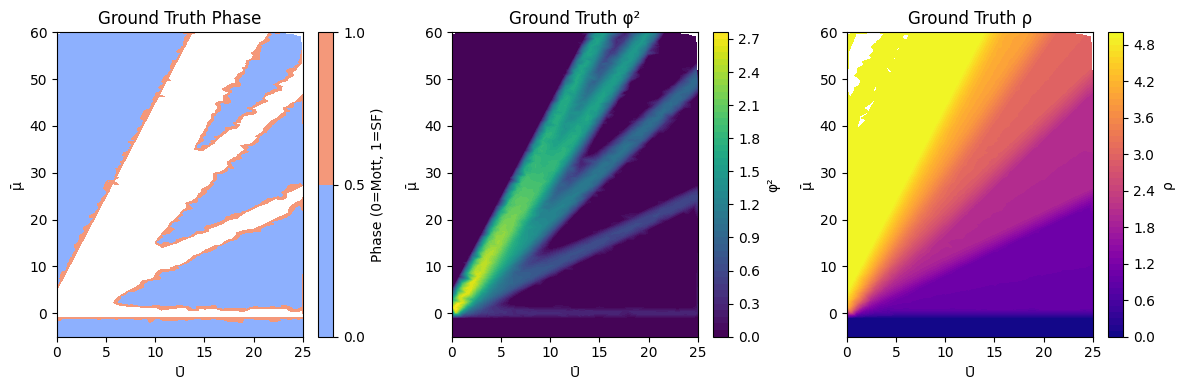


Training autoencoder...
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 436.8643 - val_loss: 73.1926
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.5634 - val_loss: 3.9860
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7413 - val_loss: 0.3170
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2340 - val_loss: 0.0680
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1015 - val_loss: 0.0496
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0606 - val_loss: 0.0368
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440 - val_loss: 0.0296
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0341 - val_loss: 0.0235
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0280 - val_loss: 0.0200
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0235 - val_loss: 0.0172
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 - val_loss: 0.0151
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

ValueError: Expected keys ListWrapper(['functional', 'functional', 'functional']) in loss dict, but found loss.keys()=['phase', 'phi2', 'rho']

In [3]:
# ========================================
# Branch 6: Autoencoder + Classifier
# ========================================

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# -------------------------------
# 1) Load dataset
# -------------------------------
df = pd.read_csv("phase_t1.0_U25.0-(0.1)_Mu60.0-(0.1).csv")

# Phase label
df["Phase"] = (df["Phi2"] > 1e-6).astype(int)

print("Dataset summary:", df.shape)

# -------------------------------
# 2) Smart sampling (like before)
# -------------------------------
df_MI = df[
    (df["Phi2"] < 1e-8) &
    (np.isclose(df["Density"], np.round(df["Density"]), atol=1e-3))
]

df_SF = df[df["Phi2"] > 1e-2]

df_boundary = df[
    (df["Phi2"] > 1e-6) & (df["Phi2"] < 1e-2)
]

n_MI = min(2000, len(df_MI))
n_SF = min(2000, len(df_SF))
n_boundary = min(6000, len(df_boundary))

df_reduced = pd.concat([
    df_MI.sample(n_MI, random_state=42),
    df_SF.sample(n_SF, random_state=42),
    df_boundary.sample(n_boundary, random_state=42)
])

df_reduced = df_reduced.reset_index(drop=True)
df = df_reduced

print("Reduced dataset summary:")
print(df["Phase"].value_counts())

# -------------------------------
# 3) Ground truth plots
# -------------------------------
plt.figure(figsize=(12,4))

# Phase diagram
plt.subplot(1,3,1)
plt.tricontourf(df["Ubar"], df["Mubar"], df["Phase"], levels=1, cmap="coolwarm")
plt.colorbar(label="Phase (0=Mott, 1=SF)")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Ground Truth Phase")

# Phi²
plt.subplot(1,3,2)
plt.tricontourf(df["Ubar"], df["Mubar"], df["Phi2"], 50, cmap="viridis")
plt.colorbar(label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Ground Truth φ²")

# Density
plt.subplot(1,3,3)
plt.tricontourf(df["Ubar"], df["Mubar"], df["Density"], 50, cmap="plasma")
plt.colorbar(label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Ground Truth ρ")

plt.tight_layout(); plt.show()

# -------------------------------
# 4) Prepare features and targets
# -------------------------------
X = df[["Ubar","Mubar"]].values.astype(np.float32)
y = {
    "phase": df["Phase"].values.astype(np.float32),
    "phi2": df["Phi2"].values.astype(np.float32),
    "rho": df["Density"].values.astype(np.float32),
}

# -------------------------------
# 5) Autoencoder pre-training
# -------------------------------
inp = keras.Input(shape=(2,))

# Encoder
e = layers.Dense(64, activation="relu")(inp)
e = layers.Dense(32, activation="relu")(e)
latent = layers.Dense(8, activation="linear", name="latent")(e)

# Decoder
d = layers.Dense(32, activation="relu")(latent)
d = layers.Dense(64, activation="relu")(d)
recon = layers.Dense(2, activation="linear", name="recon")(d)

autoencoder = keras.Model(inp, recon, name="autoencoder")
autoencoder.compile(optimizer="adam", loss="mse")

print("\nTraining autoencoder...")
autoencoder.fit(X, X, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# -------------------------------
# 6) Classifier + Regressors on latent space
# -------------------------------
encoder = keras.Model(inp, latent, name="encoder")

latent_inp = keras.Input(shape=(8,))
# Phase head
p = layers.Dense(32, activation="relu")(latent_inp)
phase_out = layers.Dense(1, activation="sigmoid", name="phase")(p)

# Phi² head
f = layers.Dense(32, activation="relu")(latent_inp)
phi2_out = layers.Dense(1, activation="relu", name="phi2")(f)

# Density head
r = layers.Dense(32, activation="relu")(latent_inp)
rho_out = layers.Dense(1, activation="relu", name="rho")(r)

classifier = keras.Model(latent_inp, [phase_out, phi2_out, rho_out])

full_inp = keras.Input(shape=(2,))
latent_vec = encoder(full_inp)
outputs = classifier(latent_vec)
full_model = keras.Model(full_inp, outputs)

full_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss={"phase":"binary_crossentropy","phi2":"mse","rho":"mse"},
    metrics={"phase":"accuracy","phi2":"mae","rho":"mae"}
)

print("\nTraining AE + Classifier...")
history = full_model.fit(
    X, {"phase": y["phase"], "phi2": y["phi2"], "rho": y["rho"]},
    epochs=100,
    batch_size=128,
    validation_split=0.15,
    verbose=1
)

# -------------------------------
# 7) Phase diagram predictions
# -------------------------------
U_vals = np.linspace(df["Ubar"].min(), df["Ubar"].max(), 200)
mu_vals = np.linspace(df["Mubar"].min(), df["Mubar"].max(), 200)
UU, MU = np.meshgrid(U_vals, mu_vals)
X_grid = np.stack([UU.ravel(), MU.ravel()], axis=1).astype(np.float32)

pred_phase, pred_phi2, pred_rho = full_model.predict(X_grid, verbose=0)

phase_pred_class = (pred_phase.ravel() > 0.5).astype(int)
phase_pred_class = phase_pred_class.reshape(UU.shape)
phi2_pred = pred_phi2.reshape(UU.shape)
rho_pred  = pred_rho.reshape(UU.shape)

# Plot predicted diagrams
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.contourf(UU, MU, phase_pred_class, levels=[-0.5,0.5,1.5], cmap="coolwarm")
plt.colorbar(ticks=[0,1], label="Phase")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Predicted Phase")

plt.subplot(1,3,2)
plt.contourf(UU, MU, phi2_pred, 50, cmap="viridis")
plt.colorbar(label="φ²")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Predicted φ²")

plt.subplot(1,3,3)
plt.contourf(UU, MU, rho_pred, 50, cmap="plasma")
plt.colorbar(label="ρ")
plt.xlabel("Ū"); plt.ylabel("μ̄"); plt.title("Predicted ρ")

plt.tight_layout(); plt.show()

# -------------------------------
# 8) Report
# -------------------------------
from sklearn.metrics import classification_report
phase_true = df["Phase"].astype(int).values
phase_pred_labels = (full_model.predict(X, verbose=0)[0].ravel() > 0.5).astype(int)
print("\n📊 Classification Report (AE + Classifier):")
print(classification_report(phase_true, phase_pred_labels, digits=4))
